In [1]:
!pip install missingno
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import calendar, datetime

In [3]:
database = pd.read_excel('COMP 1886 - Coursework dataset.xlsx')

In [4]:
database.head(3)

,Date,80% of the expenses were made by,80% of the expenses were made by .1,80% of the expenses were made in the following regions,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
0,2020-01-01,Private sector,Male,E12000001,113.90,125.01,113.52,101.79,119.09
1,2020-01-02,Private sector,Female,E12000007,117.51,128.54,117.09,107.25,121.97
2,2020-01-03,Private sector,Female,E12000006,117.63,132.20,115.70,107.47,122.00


In [5]:
database.tail(3)

,Date,80% of the expenses were made by,80% of the expenses were made by .1,80% of the expenses were made in the following regions,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
1444,2023-12-15,Public sector,Male,S92000003,139.11,154.57,86.52,148.92,95.69
1445,2023-12-16,Public sector,Male,E12000002,139.60,157.61,87.51,149.24,95.41
1446,2023-12-17,Private sector,Male,E12000001,140.08,158.97,88.85,149.36,95.98


In [6]:
database.shape

(1447, 9)

In [7]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1447 entries, 0 to 1446
Data columns (total 9 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Date                                                    1447 non-null   datetime64[ns]
 1   80% of the expenses were made by                        1365 non-null   object        
 2   80% of the expenses were made by .1                     1401 non-null   object        
 3   80% of the expenses were made in the following regions  1447 non-null   object        
 4   Miscellaneous (£)                                       1432 non-null   float64       
 5   Automotive Fuel (£)                                     1447 non-null   float64       
 6   Entertainment (£)                                       1417 non-null   float64       
 7   Food and Drink (£)                                      1447 

In [8]:
database.describe()
# quick check numerical features

,Date,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
count,1447,1432.000000,1447.000000,1417.000000,1447.000000,1447.000000
mean,2021-12-24 00:00:00,109.824930,130.305639,63.141849,121.937222,82.435708
min,2020-01-01 00:00:00,36.920000,40.160000,5.950000,86.360000,7.900000
25%,2020-12-27 12:00:00,84.057500,97.455000,31.480000,105.685000,60.530000
50%,2021-12-24 00:00:00,114.040000,135.750000,71.840000,114.520000,91.320000
75%,2022-12-20 12:00:00,136.452500,156.865000,87.750000,140.350000,106.400000
max,2023-12-17 00:00:00,166.850000,500.000000,127.960000,188.250000,139.460000
std,NaN,31.123886,39.759992,31.361024,20.224708,33.906750


## Checking dates

In [9]:
db1=database.sort_values(by='Date')
db1

,Date,80% of the expenses were made by,80% of the expenses were made by .1,80% of the expenses were made in the following regions,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
0,2020-01-01,Private sector,Male,E12000001,113.90,125.01,113.52,101.79,119.09
1,2020-01-02,Private sector,Female,E12000007,117.51,128.54,117.09,107.25,121.97
2,2020-01-03,Private sector,Female,E12000006,117.63,132.20,115.70,107.47,122.00
3,2020-01-04,Private sector,Female,E12000004,116.27,135.19,108.49,107.90,119.54
4,2020-01-05,Private sector,Female,E12000003,113.75,135.02,99.38,107.01,113.30
...,...,...,...,...,...,...,...,...,...
1442,2023-12-13,Public sector,Male,E12000006,137.50,153.44,85.91,148.46,95.29
1443,2023-12-14,NaN,Male,E12000007,138.09,153.78,86.00,148.85,95.73
1444,2023-12-15,Public sector,Male,S92000003,139.11,154.57,86.52,148.92,95.69
1445,2023-12-16,Public sector,Male,E12000002,139.60,157.61,87.51,149.24,95.41


In [10]:
dperiods = pd.period_range(start='2020-01-01', end='2023-12-31', freq='Q')
dperiods

PeriodIndex(['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2',
             '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4',
             '2023Q1', '2023Q2', '2023Q3', '2023Q4'],
            dtype='period[Q-DEC]')

In [11]:
def period(x):
  for i in dperiods:
    if x <= i.end_time and x >= i.start_time:
      return i

In [12]:
db1.loc[:,'Quarter'] = db1['Date'].apply(period)
db1.head(4)

,Date,80% of the expenses were made by,80% of the expenses were made by .1,80% of the expenses were made in the following regions,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)",Quarter
0,2020-01-01,Private sector,Male,E12000001,113.90,125.01,113.52,101.79,119.09,2020Q1
1,2020-01-02,Private sector,Female,E12000007,117.51,128.54,117.09,107.25,121.97,2020Q1
2,2020-01-03,Private sector,Female,E12000006,117.63,132.20,115.70,107.47,122.00,2020Q1
3,2020-01-04,Private sector,Female,E12000004,116.27,135.19,108.49,107.90,119.54,2020Q1


<Axes: xlabel='Quarter', ylabel='count'>

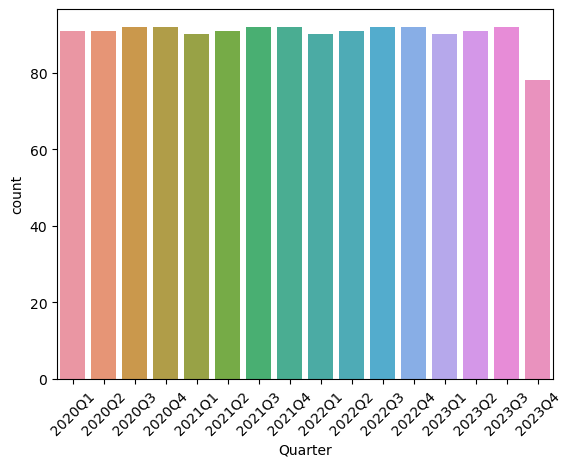

In [13]:
plt.xticks(rotation=45)
sns.countplot(db1, x='Quarter')

The data is spread evenly through the year

In [14]:
dperiods = pd.period_range(start='2020-01-01', end='2023-12-31', freq='M')
dperiods

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
             '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
             '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
             '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
            dtype='period[M]')

In [15]:
db1.loc[:,'Month'] = db1['Date'].apply(period)
db1.head()

,Date,80% of the expenses were made by,80% of the expenses were made by .1,80% of the expenses were made in the following regions,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)",Quarter,Month
0,2020-01-01,Private sector,Male,E12000001,113.90,125.01,113.52,101.79,119.09,2020Q1,2020-01
1,2020-01-02,Private sector,Female,E12000007,117.51,128.54,117.09,107.25,121.97,2020Q1,2020-01
2,2020-01-03,Private sector,Female,E12000006,117.63,132.20,115.70,107.47,122.00,2020Q1,2020-01
3,2020-01-04,Private sector,Female,E12000004,116.27,135.19,108.49,107.90,119.54,2020Q1,2020-01
4,2020-01-05,Private sector,Female,E12000003,113.75,135.02,99.38,107.01,113.30,2020Q1,2020-01


<Axes: xlabel='Month', ylabel='count'>

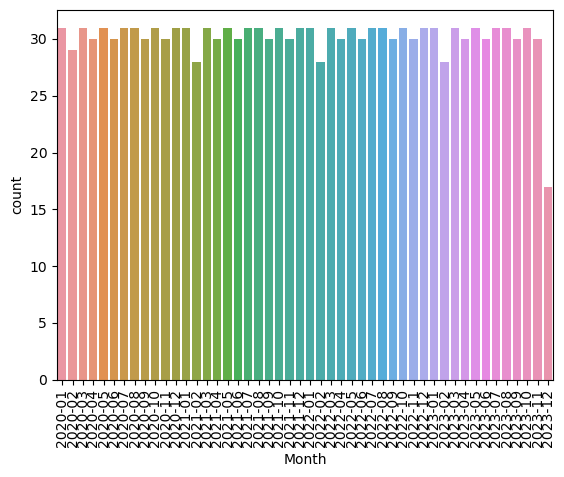

In [16]:
plt.xticks(rotation=90)
sns.countplot(db1, x='Month')

# Checking null values

<Axes: >

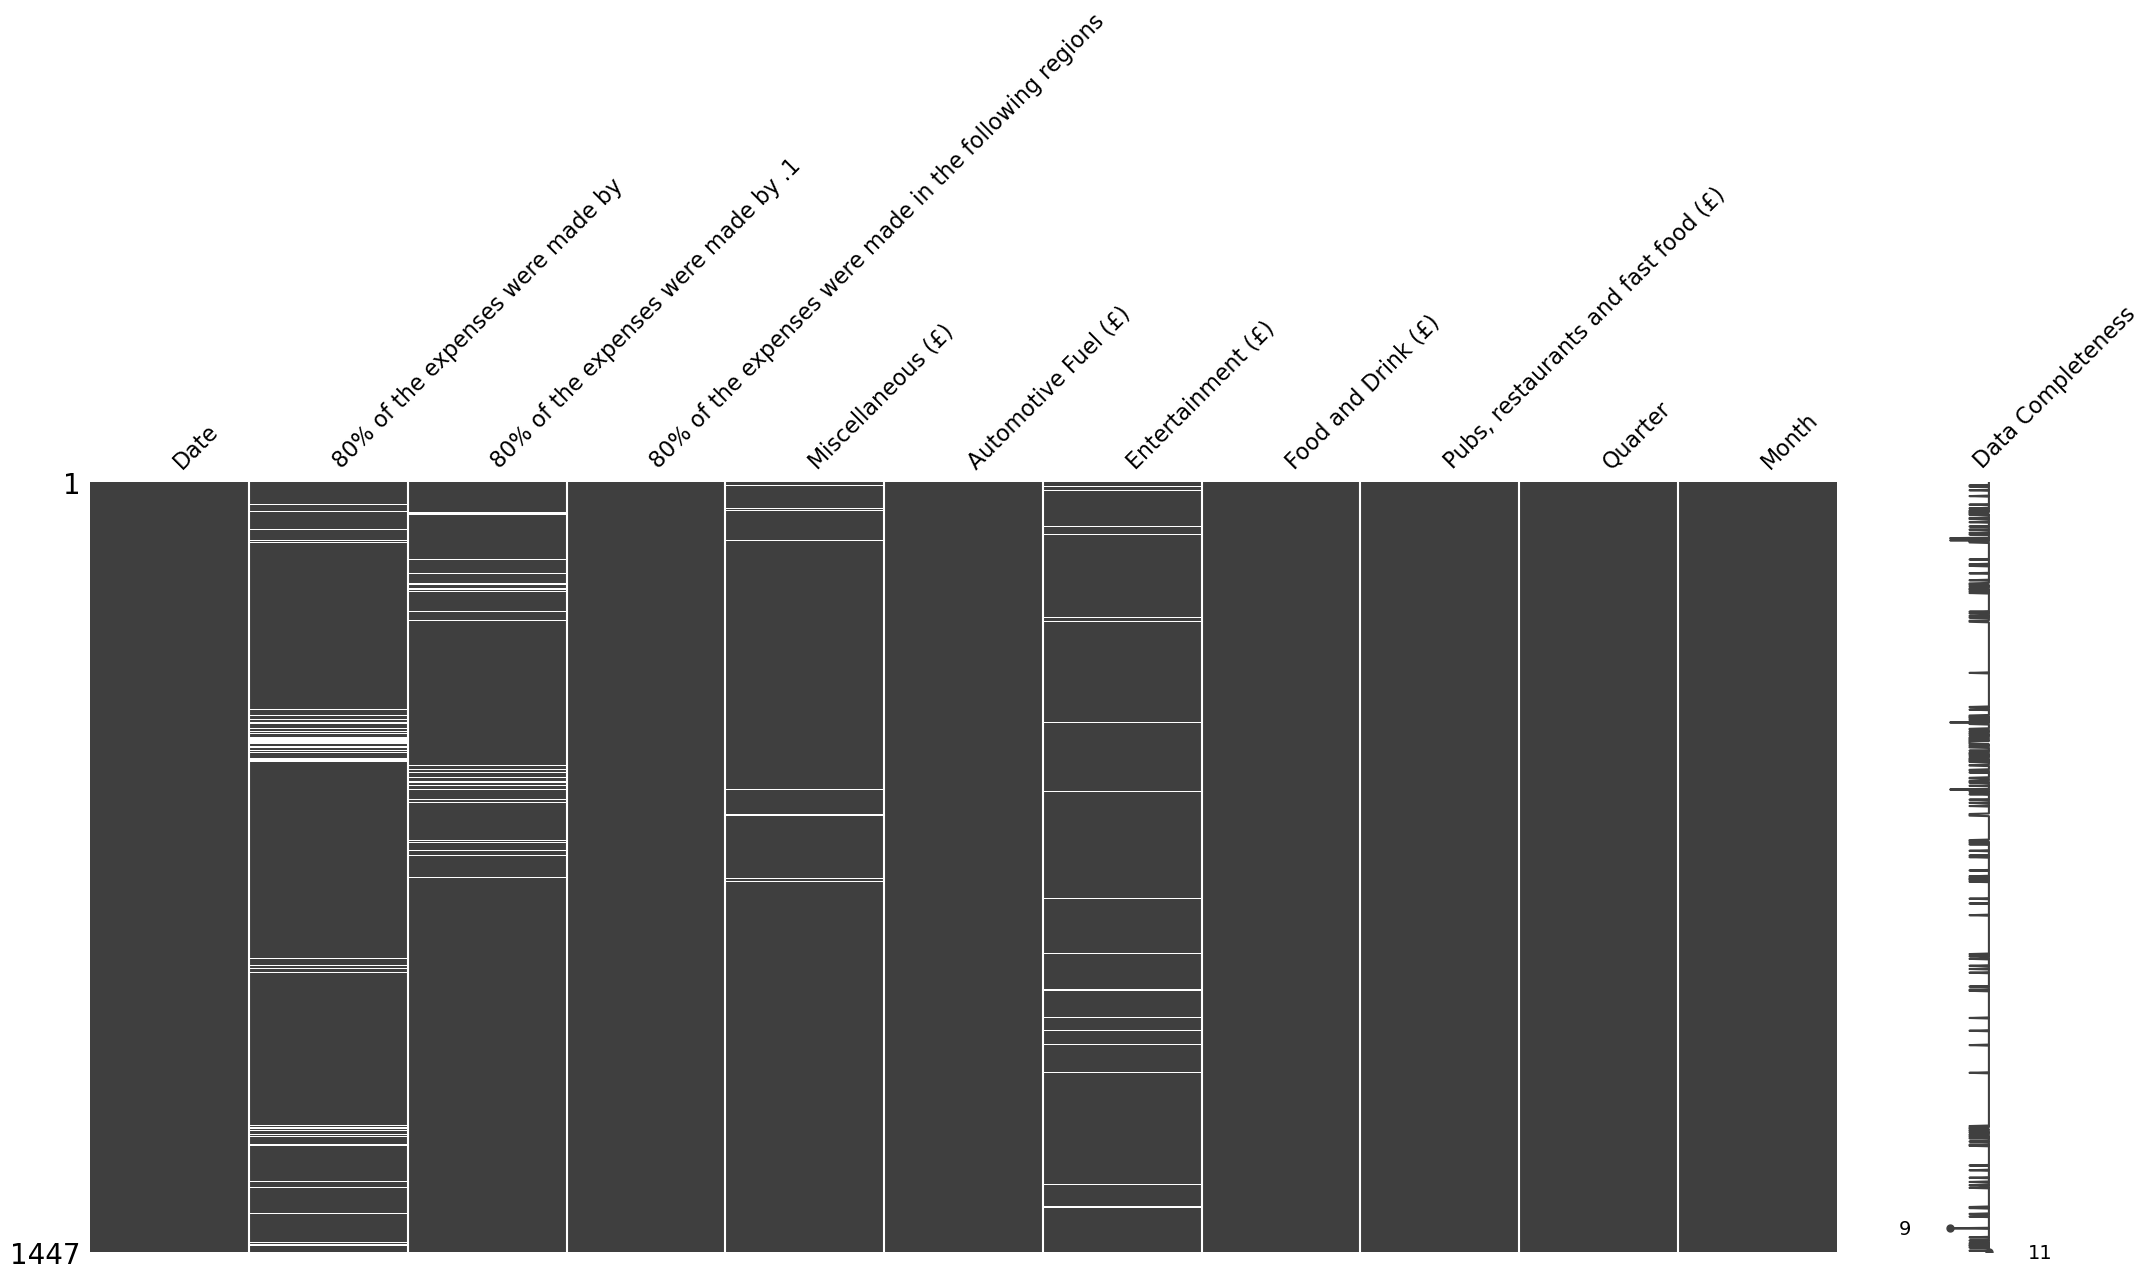

In [17]:
# checking data completeness
msno.matrix(db1,labels = any)

Just 4 attributes have null values

In [18]:
cat_features = db1.select_dtypes(include=[object])
cat_features.head()

,80% of the expenses were made by,80% of the expenses were made by .1,80% of the expenses were made in the following regions
0,Private sector,Male,E12000001
1,Private sector,Female,E12000007
2,Private sector,Female,E12000006
3,Private sector,Female,E12000004
4,Private sector,Female,E12000003


In [19]:
# To visualise in a table the number of missing values and the % they represent by feature in the cat_features dataset:
total = cat_features.isnull().sum().sort_values(ascending=False)
percent = (cat_features.isnull().sum()/cat_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data

,Total Missing Count,% of Total Observations
Feature,,
80% of the expenses were made by,82,0.056669
80% of the expenses were made by .1,46,0.031790
80% of the expenses were made in the following regions,0,0.000000


5% of the '80% of the expenses were made by' feature and 3% of '80% of the expenses were made by .1' feature

In [20]:
# Creating another dataset for numeric attributes
num_features = db1.select_dtypes(include=[float])
num_features.head()

,Miscellaneous (£),Automotive Fuel (£),Entertainment (£),Food and Drink (£),"Pubs, restaurants and fast food (£)"
0,113.90,125.01,113.52,101.79,119.09
1,117.51,128.54,117.09,107.25,121.97
2,117.63,132.20,115.70,107.47,122.00
3,116.27,135.19,108.49,107.90,119.54
4,113.75,135.02,99.38,107.01,113.30


In [21]:
total = num_features.isnull().sum().sort_values(ascending=False)
percent = (num_features.isnull().sum()/num_features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data

,Total Missing Count,% of Total Observations
Feature,,
Entertainment (£),30,0.020733
Miscellaneous (£),15,0.010366
Automotive Fuel (£),0,0.000000
Food and Drink (£),0,0.000000
"Pubs, restaurants and fast food (£)",0,0.000000


2% of Entertainment (£) feature and 1% of Miscellaneous (£)

# Visualising variability and correlation of numerical features

<Axes: >

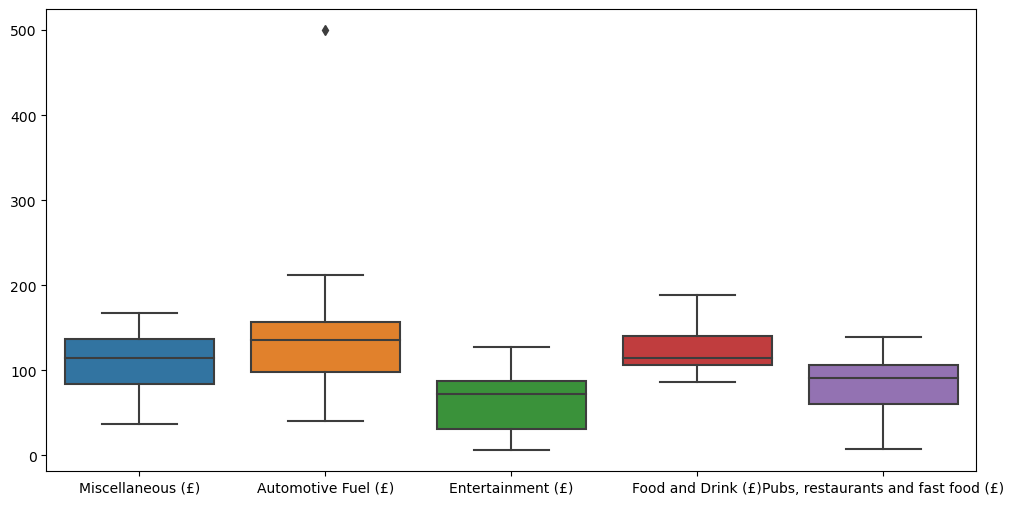

In [22]:
fig, axes = plt.subplots(figsize=(12, 6))
# fig.suptitle('Numerical features distributions')
# plt.xticks(rotation=45)
sns.boxplot(num_features)

There is an outlier in 'Automotive Fuel (£)' attribute. Miscellaneous looks kind of normal, as automotive fuel. The other 3 look skewed. 

In [23]:
corrnum = num_features.corr()

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


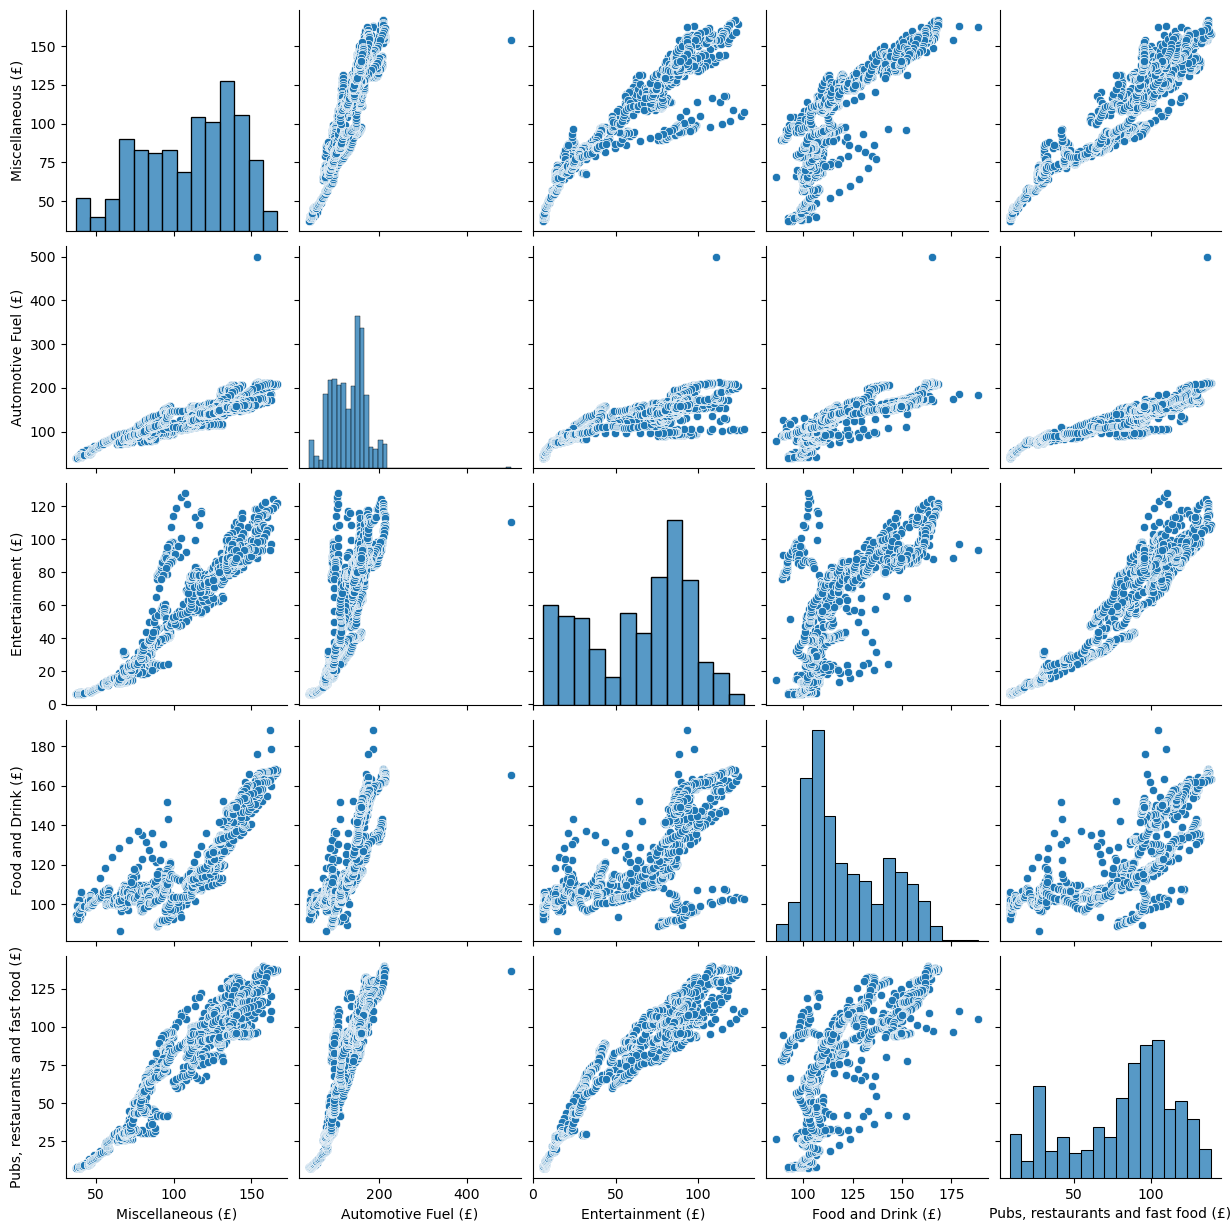

In [24]:
sns.pairplot(num_features, kind="scatter")

Easier to see the distributions of each variable and the correlations at the same time. The outlier in 'Automotive Fuel' make it harder to see correlations.

Text(0.5, 1.0, 'Miscellaneous (£)')

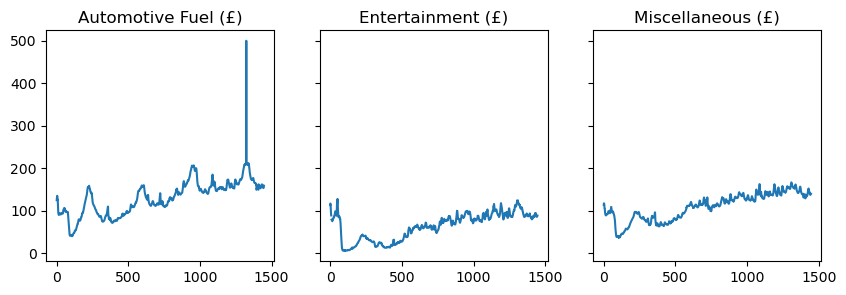

In [25]:
# We want to see the features that need some handling: 
#Automotive fuel has an outlier, Entertainment and Miscellaneous have missing values
fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=True)
axs[0].plot(db1['Automotive Fuel (£)'])
axs[0].set_title('Automotive Fuel (£)')
axs[1].plot(db1['Entertainment (£)'])
axs[1].set_title('Entertainment (£)')
axs[2].plot(db1['Miscellaneous (£)'])
axs[2].set_title('Miscellaneous (£)')

## Numerical features in time

<Axes: xlabel='Quarter'>

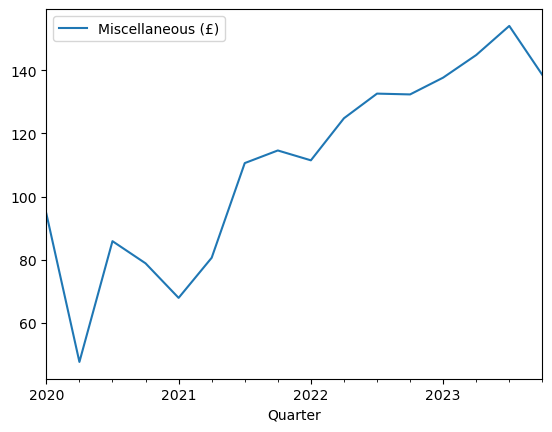

In [26]:
pivotdata=db1.pivot_table(index="Quarter",values="Miscellaneous (£)",aggfunc=np.median)
pivotdata.plot()

Looking at the median of Miscellaneous expenses by quarters. 
There is an increase over time, with a sharp fall after the first quarter of 2020 and another one for the begining of 2021. Look like the impacts of the pandemic lockdowns.

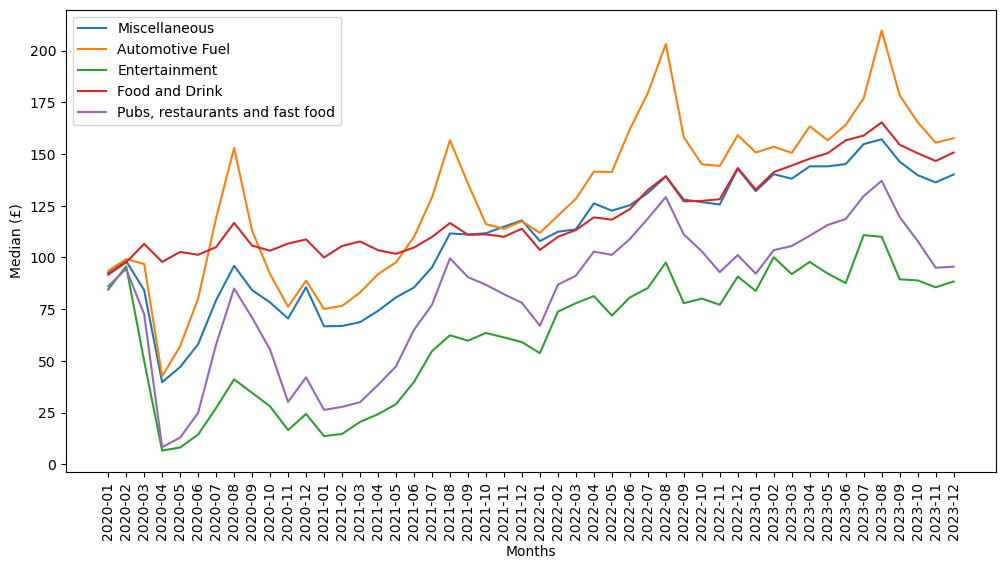

In [27]:
# Plot lines of all the numeric values, medians by month:
a = db1.groupby(["Month"])["Miscellaneous (£)"].median()
b = db1.groupby(["Month"])["Automotive Fuel (£)"].median()
c = db1.groupby(["Month"])["Entertainment (£)"].median()
d = db1.groupby(["Month"])["Food and Drink (£)"].median()
e = db1.groupby(["Month"])["Pubs, restaurants and fast food (£)"].median()
months = ['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
             '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12',
             '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
             '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
             '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
             '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
             '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
             '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12']
plt.figure(figsize=(12,6))
plt.plot(months, a, label="Miscellaneous")
plt.plot(months, b, label="Automotive Fuel")
plt.plot(months, c, label="Entertainment")
plt.plot(months, d, label="Food and Drink")
plt.plot(months, e, label="Pubs, restaurants and fast food")
plt.xticks(rotation=90)
plt.xlabel('Months')
plt.ylabel('Median (£)')
plt.legend(loc=0)

All variables have increased over time. Inflation must have something to do with it.
Automotive fuel, pubs and restaurants and Entertainment have sharp peaks, during the summer months.
Food and Drink varies less than the other features, it must refer to the expenses in groceries and household staples, which are less prone to fluctuation.

# Categorical features

Text(0.5, 1.0, 'Region')

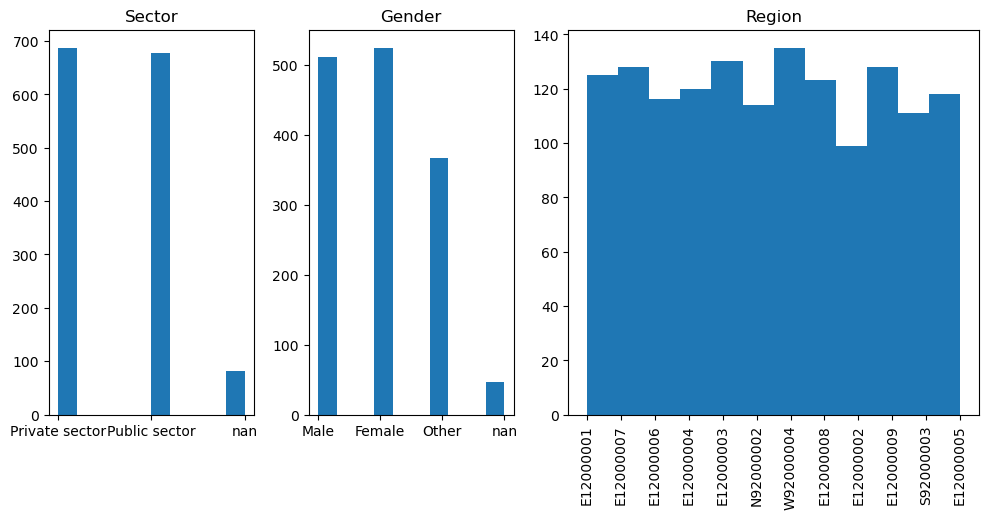

In [28]:
# visualising the categorical features and its values:
fig, axs = plt.subplots(1,3, figsize=(12,5),gridspec_kw={'width_ratios': [1, 1, 2]})
plt.xticks(rotation=90)
sector=cat_features['80% of the expenses were made by '].tolist()
gender=cat_features['80% of the expenses were made by .1'].tolist()
region=cat_features['80% of the expenses were made in the following regions'].tolist()
axs[0].hist(sector)
axs[0].set_title('Sector')
axs[1].hist(gender)
axs[1].set_title('Gender')
axs[2].hist(region, bins=12)
axs[2].set_title('Region')
# Changed titles names because its easier to read (and fit in the graph)

In Sector and Gender there is a small proportion of missing values. In gender, the value 'Other' has a significant value, so, between other and nan, could be the third of the data.

<Axes: xlabel='Quarter', ylabel='count'>

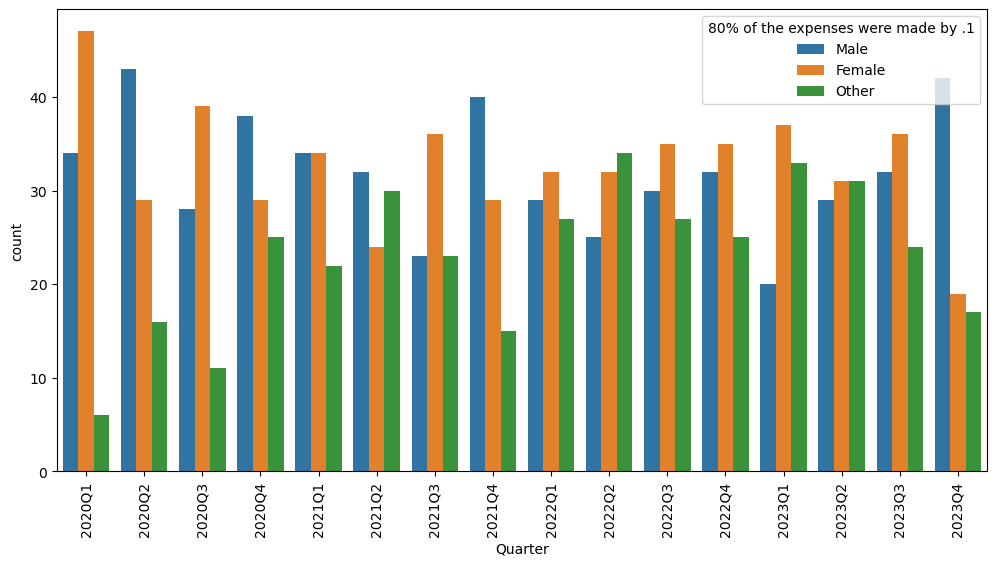

In [29]:
# visualising gender in time
fig, ax = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(db1, x="Quarter", hue="80% of the expenses were made by .1")

<Axes: xlabel='Quarter', ylabel='count'>

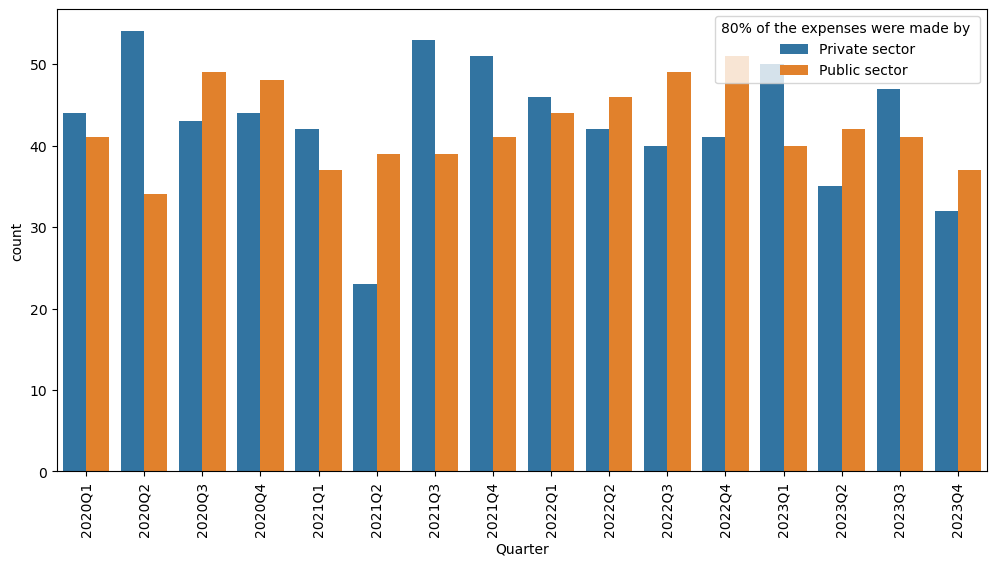

In [30]:
# visualising expenses made by sector in time 
fig, ax = plt.subplots(figsize=(12,6))
plt.xticks(rotation=90)
sns.countplot(db1, x="Quarter", hue="80% of the expenses were made by ")

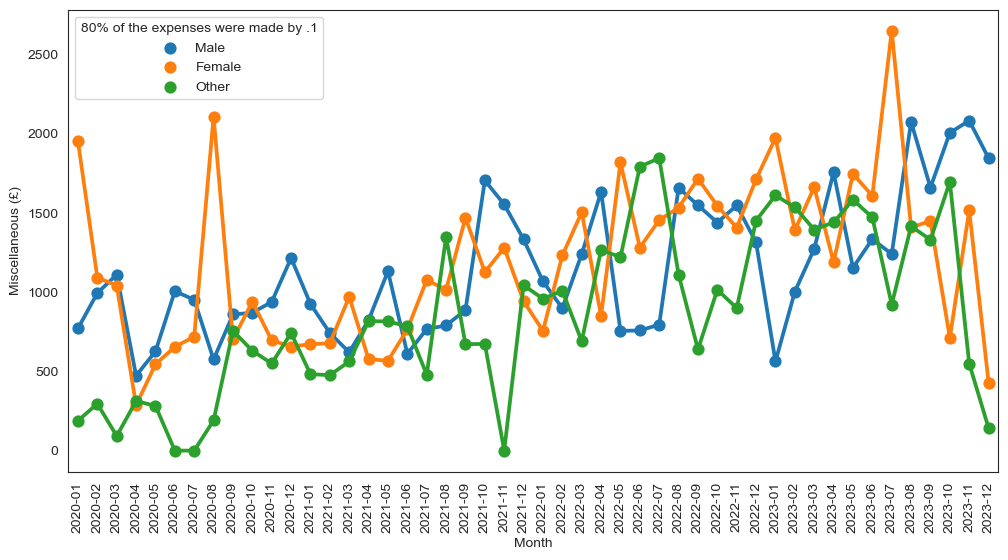

In [31]:
# visualising expenses made by gender in time (month) in the miscellaneous attribute
sns.set_style("white")
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
g1 = sns.pointplot(x='Month', y='Miscellaneous (£)', data=db1, hue='80% of the expenses were made by .1',
                   estimator='sum', errorbar= None)

The most significant thing are the sharp peaks in the female expenses. 

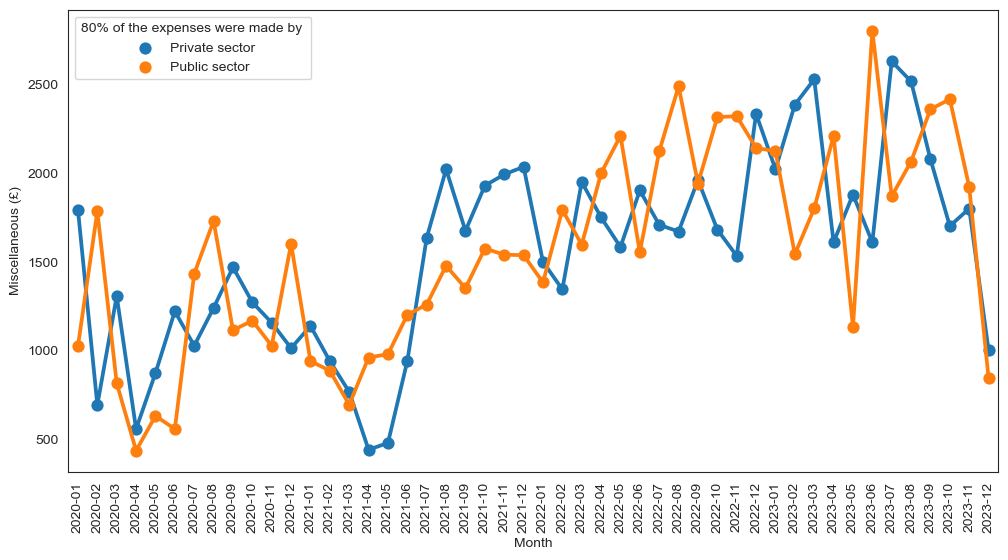

In [32]:
# visualising expenses made by sector in time (months) in the miscellaneous attribute
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
g1 = sns.pointplot(x='Month', y='Miscellaneous (£)', data=db1, hue='80% of the expenses were made by ',estimator='sum', errorbar= None)

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


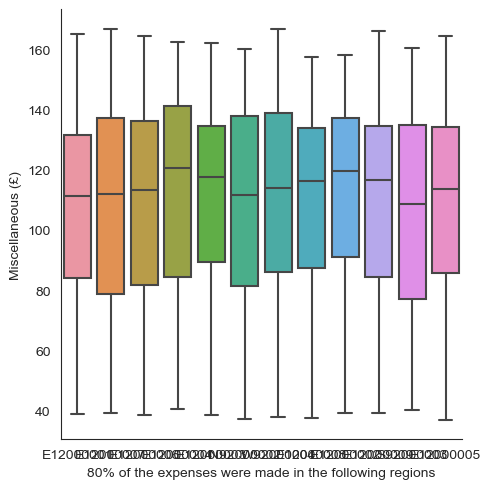

In [33]:
# visualising the distribution of expenses in miscellaneous category, by region
regionplot = sns.catplot(data=db1, x="80% of the expenses were made in the following regions", y="Miscellaneous (£)", kind="box")
# Can't make the x axis rotate

# Data Pre-processing

### Renaming features

In [34]:
# COPY DATAFRAME
db2=db1.copy()

In [35]:
db2.rename(columns={'80% of the expenses were made by ':'Sector', 
                    '80% of the expenses were made by .1':'Gender',
                    '80% of the expenses were made in the following regions':'Region'}, inplace=True)

In [36]:
db2.rename(columns={'Miscellaneous (£)':'Miscellaneous',
                    'Automotive Fuel (£)':'AutomotiveFuel',
                    'Entertainment (£)':'Entertainment',
                    'Food and Drink (£)':'Groceries',
                    'Pubs, restaurants and fast food (£)':'EatingOut'}, inplace=True)

In [37]:
db2.drop(columns=['Quarter', 'Month'], inplace=True)

In [38]:
db2.head(3)
# Ta dah!

,Date,Sector,Gender,Region,Miscellaneous,AutomotiveFuel,Entertainment,Groceries,EatingOut
0,2020-01-01,Private sector,Male,E12000001,113.90,125.01,113.52,101.79,119.09
1,2020-01-02,Private sector,Female,E12000007,117.51,128.54,117.09,107.25,121.97
2,2020-01-03,Private sector,Female,E12000006,117.63,132.20,115.70,107.47,122.00


### Handling outlier

In [39]:
# JUST DO THIS ONCE!

# From: https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
# Calculate the upper and lower limits in 'AutomotiveFuel' column
Q1 = db2['AutomotiveFuel'].quantile(0.25)
Q3 = db2['AutomotiveFuel'].quantile(0.75)
IQR = Q3 - Q1
# lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(db2['AutomotiveFuel'] >= upper)[0]
# Removing the outliers
db2.drop(index=upper_array, inplace=True)

In [40]:
db2.shape

(1446, 9)

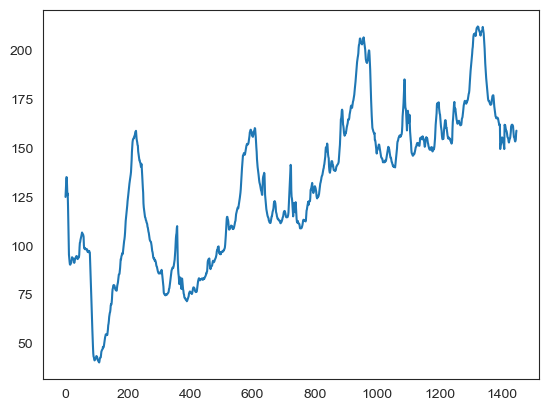

In [41]:
# visualising this feature
db2['AutomotiveFuel'].plot()
plt.show()

### Handling missing values

In [42]:
db2.isnull().sum()

Date               0
Sector            82
Gender            46
Region             0
Miscellaneous     15
AutomotiveFuel     0
Entertainment     30
Groceries          0
EatingOut          0
dtype: int64

In [43]:
# Checking the attribute with less null values
db2[db2.Miscellaneous.isnull()]

,Date,Sector,Gender,Region,Miscellaneous,AutomotiveFuel,Entertainment,Groceries,EatingOut
6,2020-01-07,Private sector,Female,W92000004,NaN,125.94,90.36,89.60,94.64
49,2020-02-19,Private sector,Male,W92000004,NaN,103.66,123.10,103.57,105.37
53,2020-02-23,Public sector,Male,E12000006,NaN,106.78,108.44,100.17,109.76
105,2020-04-15,Public sector,Other,E12000003,NaN,41.23,NaN,97.71,8.06
109,2020-04-19,NaN,Male,E12000006,NaN,40.94,6.42,95.97,8.52
112,2020-04-22,Private sector,Other,N92000002,NaN,42.73,6.34,96.73,8.61
577,2021-07-31,Private sector,NaN,E12000005,NaN,148.21,55.94,112.97,89.31
624,2021-09-16,Public sector,Female,E12000007,NaN,131.16,55.90,110.23,90.41
625,2021-09-17,Private sector,Female,E12000004,NaN,130.15,55.25,109.99,90.48
626,2021-09-18,Private sector,Female,E12000008,NaN,129.22,54.95,109.79,90.30


Some rows have NaN in other features too. I'll drop those rows

In [44]:
db2.dropna(subset=['Miscellaneous', 'Entertainment'], how='all', inplace=True)

In [45]:
db2.dropna(subset=['Sector','Miscellaneous'], how='all', inplace=True)

In [46]:
db2.dropna(subset=['Gender','Miscellaneous'], how='all', inplace=True)

In [47]:
db2['Miscellaneous'].isnull().sum()

12

In [48]:
db2[db2.Entertainment.isnull()]

,Date,Sector,Gender,Region,Miscellaneous,AutomotiveFuel,Entertainment,Groceries,EatingOut
8,2020-01-09,Private sector,Female,E12000004,99.35,120.41,NaN,92.68,82.95
15,2020-01-16,Public sector,Female,E12000009,89.04,90.28,NaN,88.97,78.20
69,2020-03-10,Public sector,Male,E12000007,94.29,97.81,NaN,106.68,95.07
83,2020-03-24,Private sector,Female,E12000007,52.18,72.26,NaN,113.35,19.11
98,2020-04-08,Private sector,Female,E12000005,39.86,42.48,NaN,100.68,8.24
157,2020-06-06,Private sector,Male,E12000007,57.53,79.52,NaN,103.56,21.58
254,2020-09-11,Public sector,Female,E12000007,85.24,116.14,NaN,105.89,71.51
261,2020-09-18,Private sector,Female,E12000008,83.49,111.59,NaN,105.46,69.87
262,2020-09-19,Private sector,Other,N92000002,83.23,110.98,NaN,105.09,69.47
358,2020-12-24,Public sector,Male,E12000006,95.90,110.03,NaN,151.78,41.66


In [49]:
db2.dropna(subset=['Sector', 'Entertainment'], how='all', inplace=True)

In [50]:
db2['Entertainment'].isnull().sum()

27

In [51]:
db2.dropna(subset=['Sector', 'Gender'], how='all', inplace=True)

In [52]:
db2.shape

(1441, 9)

Now fill with word 'Missing' the rest of NaN in the categorical features.

In [53]:
db2['Sector'].fillna(value="Missing", inplace=True)
db2['Sector'].value_counts()

Sector
Private sector    686
Public sector     676
Missing            79
Name: count, dtype: int64

In [54]:
db2['Gender'].fillna(value="Missing", inplace=True)
db2['Gender'].value_counts()

Gender
Female     523
Male       508
Other      365
Missing     45
Name: count, dtype: int64

Now fill the missing values in the numerical features

In [55]:
# Filling missing values in 'Miscellaneous' with the interpolation method 
db2['Miscellaneous'] = db2['Miscellaneous'].interpolate(method='linear')

In [56]:
# Filling missing values in 'Entertainment' with the interpolation method 
db2['Entertainment'] = db2['Entertainment'].interpolate(method='linear')

In [57]:
# Checking data completeness
db2.isnull().sum()

Date              0
Sector            0
Gender            0
Region            0
Miscellaneous     0
AutomotiveFuel    0
Entertainment     0
Groceries         0
EatingOut         0
dtype: int64

In [58]:
db2.shape

(1441, 9)

Text(0.5, 1.0, 'Miscellaneous')

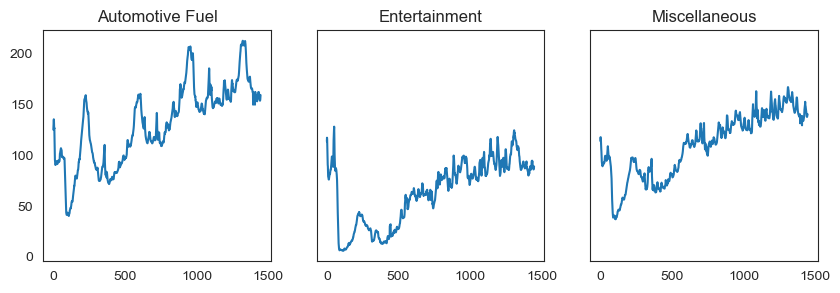

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=True)
axs[0].plot(db2['AutomotiveFuel'])
axs[1].plot(db2['Entertainment'])
axs[2].plot(db2['Miscellaneous'])
axs[0].set_title('Automotive Fuel')
axs[1].set_title('Entertainment')
axs[2].set_title('Miscellaneous')

# Visualising correlation of numerical features

In [60]:
# To visualise the numeric features again
num_features2 = db2.select_dtypes(include=[float])

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


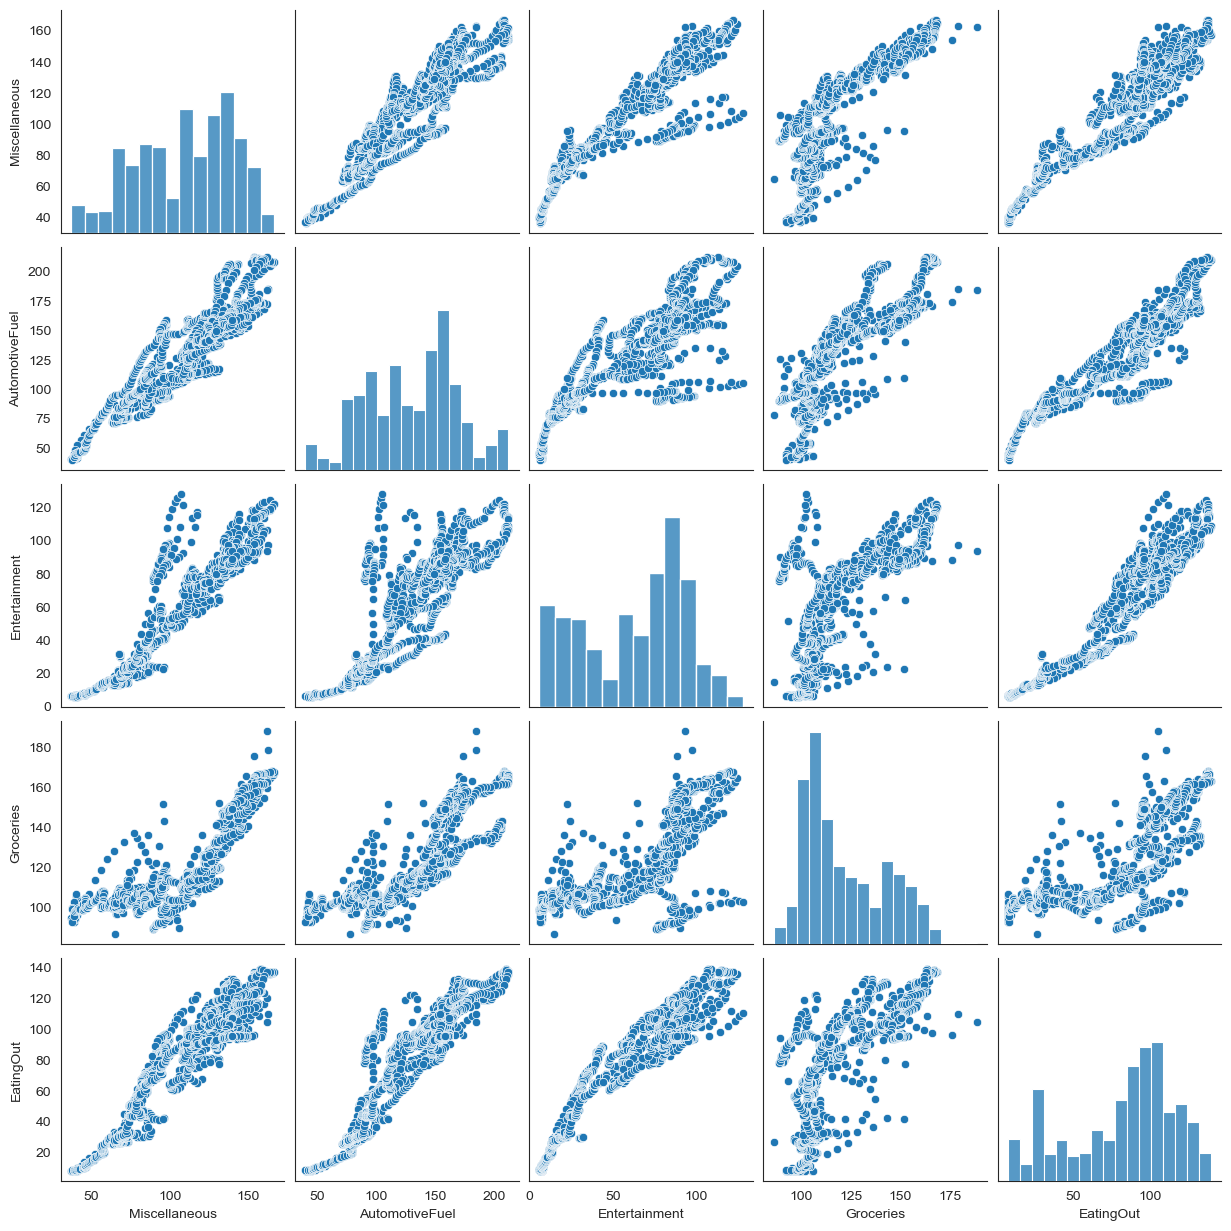

In [61]:
sns.pairplot(num_features2, kind="scatter")

Easier to see some variables are correlated: Like Miscellaneous, Entertainment and Automotive Fuel are clearly correlated.
Groceries is the less correlated

## Encoding

In [62]:
print(db2['Gender'].unique())

['Male' 'Female' 'Other' 'Missing']


In [63]:
db3 = db2.copy()

In [64]:
genderdf = db3['Gender']

In [65]:
# to do label encoding
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Gender'],return_df=True, mapping=[{'col':'Gender','mapping':{'Male':0,'Female':1,'Other':2,'Missing':3}}])

In [66]:
db3['GenderCode'] = encoder.fit_transform(genderdf)

In [67]:
db3.head(10)

,Date,Sector,Gender,Region,Miscellaneous,AutomotiveFuel,Entertainment,Groceries,EatingOut,GenderCode
0,2020-01-01,Private sector,Male,E12000001,113.900,125.01,113.520,101.79,119.09,0
1,2020-01-02,Private sector,Female,E12000007,117.510,128.54,117.090,107.25,121.97,1
2,2020-01-03,Private sector,Female,E12000006,117.630,132.20,115.700,107.47,122.00,1
3,2020-01-04,Private sector,Female,E12000004,116.270,135.19,108.490,107.90,119.54,1
4,2020-01-05,Private sector,Female,E12000003,113.750,135.02,99.380,107.01,113.30,1
5,2020-01-06,Private sector,Female,N92000002,108.190,130.53,92.480,100.28,104.76,1
6,2020-01-07,Private sector,Female,W92000004,106.095,125.94,90.360,89.60,94.64,1
7,2020-01-08,Public sector,Male,E12000004,104.000,126.75,89.030,95.17,87.77,0
8,2020-01-09,Private sector,Female,E12000004,99.350,120.41,84.075,92.68,82.95,1
9,2020-01-10,Public sector,Other,W92000004,95.520,111.01,79.120,91.44,80.20,2


In [68]:
print(db3['Sector'].unique())

['Private sector' 'Public sector' 'Missing']


In [69]:
x = db3.iloc[:,[0,1]].values
print(x)

[[Timestamp('2020-01-01 00:00:00') 'Private sector']
 [Timestamp('2020-01-02 00:00:00') 'Private sector']
 [Timestamp('2020-01-03 00:00:00') 'Private sector']
 ...
 [Timestamp('2023-12-15 00:00:00') 'Public sector']
 [Timestamp('2023-12-16 00:00:00') 'Public sector']
 [Timestamp('2023-12-17 00:00:00') 'Private sector']]


In [70]:
# For the One-hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[1])], remainder= 'passthrough')
x = np.array(ct.fit_transform(x))
print(x)

[[0.0 1.0 0.0 Timestamp('2020-01-01 00:00:00')]
 [0.0 1.0 0.0 Timestamp('2020-01-02 00:00:00')]
 [0.0 1.0 0.0 Timestamp('2020-01-03 00:00:00')]
 ...
 [0.0 0.0 1.0 Timestamp('2023-12-15 00:00:00')]
 [0.0 0.0 1.0 Timestamp('2023-12-16 00:00:00')]
 [0.0 1.0 0.0 Timestamp('2023-12-17 00:00:00')]]


In [71]:
db4= pd.DataFrame(np.array(x), columns=['MissingS','PrivateSector','PublicSector','Date'])
db4.head(10)

,MissingS,PrivateSector,PublicSector,Date
0,0.0,1.0,0.0,2020-01-01
1,0.0,1.0,0.0,2020-01-02
2,0.0,1.0,0.0,2020-01-03
3,0.0,1.0,0.0,2020-01-04
4,0.0,1.0,0.0,2020-01-05
5,0.0,1.0,0.0,2020-01-06
6,0.0,1.0,0.0,2020-01-07
7,0.0,0.0,1.0,2020-01-08
8,0.0,1.0,0.0,2020-01-09
9,0.0,0.0,1.0,2020-01-10


In [72]:
db5=db3.merge(db4,left_on='Date', right_on='Date')

In [73]:
db5.head(10)

,Date,Sector,Gender,Region,Miscellaneous,AutomotiveFuel,Entertainment,Groceries,EatingOut,GenderCode,MissingS,PrivateSector,PublicSector
0,2020-01-01,Private sector,Male,E12000001,113.900,125.01,113.520,101.79,119.09,0,0.0,1.0,0.0
1,2020-01-02,Private sector,Female,E12000007,117.510,128.54,117.090,107.25,121.97,1,0.0,1.0,0.0
2,2020-01-03,Private sector,Female,E12000006,117.630,132.20,115.700,107.47,122.00,1,0.0,1.0,0.0
3,2020-01-04,Private sector,Female,E12000004,116.270,135.19,108.490,107.90,119.54,1,0.0,1.0,0.0
4,2020-01-05,Private sector,Female,E12000003,113.750,135.02,99.380,107.01,113.30,1,0.0,1.0,0.0
5,2020-01-06,Private sector,Female,N92000002,108.190,130.53,92.480,100.28,104.76,1,0.0,1.0,0.0
6,2020-01-07,Private sector,Female,W92000004,106.095,125.94,90.360,89.60,94.64,1,0.0,1.0,0.0
7,2020-01-08,Public sector,Male,E12000004,104.000,126.75,89.030,95.17,87.77,0,0.0,0.0,1.0
8,2020-01-09,Private sector,Female,E12000004,99.350,120.41,84.075,92.68,82.95,1,0.0,1.0,0.0
9,2020-01-10,Public sector,Other,W92000004,95.520,111.01,79.120,91.44,80.20,2,0.0,0.0,1.0


In [74]:
print(db3['Region'].unique())

['E12000001' 'E12000007' 'E12000006' 'E12000004' 'E12000003' 'N92000002'
 'W92000004' 'E12000008' 'E12000002' 'E12000009' 'S92000003' 'E12000005']


In [75]:
regiondf = db5['Region']

In [76]:
encoder = ce.OrdinalEncoder(cols=['Region'],return_df=True, mapping=[{'col':'Region','mapping':{'E12000001':0,'E12000002':1,'E12000003':2,'E12000004':3,'E12000005':4,'E12000006':5,'E12000007':6,'E12000008':7,'E12000009':8,'S92000003':9,'N92000002':10,'W92000004':11}}])

In [77]:
db5['RegionCode'] = encoder.fit_transform(regiondf)

In [78]:
db5.head(20)

,Date,Sector,Gender,Region,Miscellaneous,AutomotiveFuel,Entertainment,Groceries,EatingOut,GenderCode,MissingS,PrivateSector,PublicSector,RegionCode
0,2020-01-01,Private sector,Male,E12000001,113.900,125.01,113.520,101.79,119.09,0,0.0,1.0,0.0,0
1,2020-01-02,Private sector,Female,E12000007,117.510,128.54,117.090,107.25,121.97,1,0.0,1.0,0.0,6
2,2020-01-03,Private sector,Female,E12000006,117.630,132.20,115.700,107.47,122.00,1,0.0,1.0,0.0,5
3,2020-01-04,Private sector,Female,E12000004,116.270,135.19,108.490,107.90,119.54,1,0.0,1.0,0.0,3
4,2020-01-05,Private sector,Female,E12000003,113.750,135.02,99.380,107.01,113.30,1,0.0,1.0,0.0,2
5,2020-01-06,Private sector,Female,N92000002,108.190,130.53,92.480,100.28,104.76,1,0.0,1.0,0.0,10
6,2020-01-07,Private sector,Female,W92000004,106.095,125.94,90.360,89.60,94.64,1,0.0,1.0,0.0,11
7,2020-01-08,Public sector,Male,E12000004,104.000,126.75,89.030,95.17,87.77,0,0.0,0.0,1.0,3
8,2020-01-09,Private sector,Female,E12000004,99.350,120.41,84.075,92.68,82.95,1,0.0,1.0,0.0,3
9,2020-01-10,Public sector,Other,W92000004,95.520,111.01,79.120,91.44,80.20,2,0.0,0.0,1.0,11


In [79]:
db5.shape

(1441, 14)

db5 has all the variables, including encoded ones

In [80]:
enc_features = db5.iloc[:,9:14]
enc_features.head()

,GenderCode,MissingS,PrivateSector,PublicSector,RegionCode
0,0,0.0,1.0,0.0,0
1,1,0.0,1.0,0.0,6
2,1,0.0,1.0,0.0,5
3,1,0.0,1.0,0.0,3
4,1,0.0,1.0,0.0,2


In [81]:
enc_features.shape

(1441, 5)

## Normalisation

In [82]:
num_features3 = db5.iloc[:,4:9]
num_features3.head()

,Miscellaneous,AutomotiveFuel,Entertainment,Groceries,EatingOut
0,113.90,125.01,113.52,101.79,119.09
1,117.51,128.54,117.09,107.25,121.97
2,117.63,132.20,115.70,107.47,122.00
3,116.27,135.19,108.49,107.90,119.54
4,113.75,135.02,99.38,107.01,113.30


In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
def scale_dataset(numeric):
    """Standard Scale test and train data Z - Score normalization"""
    standard_scaler = StandardScaler()
    numeric_scaled = pd.DataFrame(
      standard_scaler.fit_transform(numeric),
      columns=numeric.columns)
    return numeric_scaled
db_num = scale_dataset(num_features3)

In [85]:
db_num.head()

,Miscellaneous,AutomotiveFuel,Entertainment,Groceries,EatingOut
0,0.134839,-0.134307,1.604683,-0.998047,1.082282
1,0.251187,-0.042499,1.718644,-0.727632,1.167512
2,0.255054,0.052690,1.674272,-0.716736,1.168399
3,0.211222,0.130453,1.444117,-0.695439,1.095599
4,0.130005,0.126032,1.153310,-0.739518,0.910935


In [86]:
db_num.shape

(1441, 5)

In [87]:
# New dataframe
db6 = pd.concat([db_num, enc_features], axis=1)

In [88]:
db6.head(10)

,Miscellaneous,AutomotiveFuel,Entertainment,Groceries,EatingOut,GenderCode,MissingS,PrivateSector,PublicSector,RegionCode
0,0.134839,-0.134307,1.604683,-0.998047,1.082282,0,0.0,1.0,0.0,0
1,0.251187,-0.042499,1.718644,-0.727632,1.167512,1,0.0,1.0,0.0,6
2,0.255054,0.052690,1.674272,-0.716736,1.168399,1,0.0,1.0,0.0,5
3,0.211222,0.130453,1.444117,-0.695439,1.095599,1,0.0,1.0,0.0,3
4,0.130005,0.126032,1.153310,-0.739518,0.910935,1,0.0,1.0,0.0,2
5,-0.049190,0.009257,0.933050,-1.072832,0.658206,1,0.0,1.0,0.0,10
6,-0.116710,-0.110119,0.865376,-1.601777,0.358718,1,0.0,1.0,0.0,11
7,-0.184230,-0.089053,0.822920,-1.325914,0.155410,0,0.0,0.0,1.0,3
8,-0.334096,-0.253942,0.664748,-1.449235,0.012769,1,0.0,1.0,0.0,3
9,-0.457534,-0.498416,0.506576,-1.510648,-0.068614,2,0.0,0.0,1.0,11


In [89]:
db6.shape

(1441, 10)

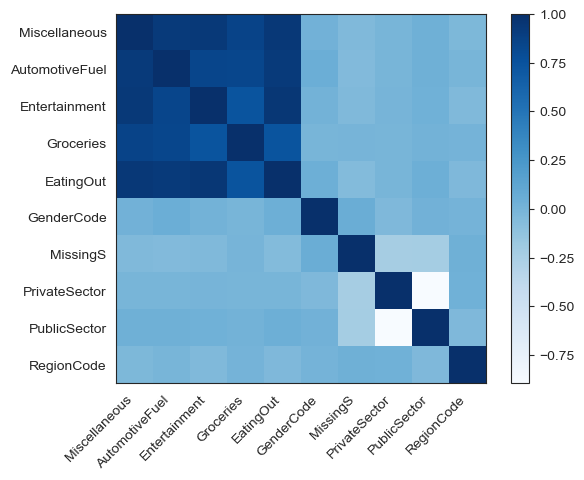

In [90]:
matrix = db6.corr()

#plotting correlation matrix 
plt.imshow(matrix, cmap='Blues')

#adding colorbar 
plt.colorbar()

#extracting variable names 
variables = []
for i in matrix.columns:
  variables.append(i)

# Adding labels to the matrix
plt.xticks(range(len(matrix)), variables, rotation=45, ha='right')
plt.yticks(range(len(matrix)), variables)

# Display the plot
plt.show()

db6 has the numerical features normalized and the categorical features encoded

# Supervised ML algorithm: Prediction 

### Multiple linear regression

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math

In [92]:
dbP = db5[['Miscellaneous','AutomotiveFuel','Entertainment','Groceries','EatingOut','GenderCode','MissingS','PrivateSector','PublicSector','RegionCode']]

In [93]:
dbP.head()

,Miscellaneous,AutomotiveFuel,Entertainment,Groceries,EatingOut,GenderCode,MissingS,PrivateSector,PublicSector,RegionCode
0,113.90,125.01,113.52,101.79,119.09,0,0.0,1.0,0.0,0
1,117.51,128.54,117.09,107.25,121.97,1,0.0,1.0,0.0,6
2,117.63,132.20,115.70,107.47,122.00,1,0.0,1.0,0.0,5
3,116.27,135.19,108.49,107.90,119.54,1,0.0,1.0,0.0,3
4,113.75,135.02,99.38,107.01,113.30,1,0.0,1.0,0.0,2


In [94]:
# Defining the values of the first column (Miscellaneous) as the target and the rest columns as independent variables.
X = dbP.iloc[:, 1:9].values
Y = dbP.iloc[:, 0].values

In [95]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [96]:
print(Y_test)

[ 99.32  150.01  144.56   86.72   51.37   67.73   94.89   82.58   72.88
 144.5   114.6   111.94   58.2   114.61  138.37   82.    121.96  126.67
 124.85  153.16   69.17   84.55  108.51  149.79  133.78  123.37   51.39
  97.54  125.05   97.49   97.24   83.23  129.73   75.37  142.66  115.6
 130.07  118.27   37.35   74.33  113.75  108.68   80.6   104.58  124.72
 142.17   84.88  158.19  100.37  140.44  151.56   84.05  117.41   85.
  56.26  124.21   86.07  125.47  137.71   67.02  154.51  153.72   70.53
 117.15   62.89  123.05  130.61   94.07  132.49   56.35   66.75  141.54
 136.09  155.22  113.5   104.17  127.3    72.89  137.43  144.86   97.64
 124.81   74.06  148.16   67.45  125.98  112.02   64.44  143.32  121.76
 116.5   142.33   75.33   84.17  155.19  154.01   82.79  142.25  150.22
 135.94   72.44  152.21  143.43   83.23  123.2   134.88  154.29  138.24
  45.19   87.34  138.07   96.92  132.89   82.34  127.01  138.67  108.19
 141.36   79.07  111.76  134.38   54.52   66.91  128.95  109.32   9

In [97]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [98]:
regressor.coef_

array([ 0.12211756,  0.34805083,  0.4185552 ,  0.2525079 ,  0.29971078,
       -1.15825162,  0.56597641,  0.59227521])

In [99]:
regressor.intercept_

-0.7283130677859901

In [100]:
pred_y = regressor.predict(X_test)

In [101]:
pred_y

array([108.6901292 , 134.96331899, 146.30733455,  71.31897702,
        58.61404086,  65.19255846,  97.56916919,  81.42685422,
        72.26757269, 136.36940392, 102.33216937, 103.58962118,
        65.26357327, 100.67732592, 140.91703094,  83.53496536,
       108.79402075, 127.09210254, 122.46933001, 163.8548024 ,
        70.19385581,  88.36477468, 103.03855528, 136.92369221,
       134.76999581, 120.83698592,  59.30799782, 107.86109792,
       120.22777244, 107.75795401, 105.33470261,  88.73136644,
       128.41705015,  76.10209917, 127.75111439, 103.24402544,
       126.14704124, 118.57037205,  48.36744251,  72.5987785 ,
       124.61371597, 126.24628352,  80.88546279, 116.58961321,
       121.35311007, 143.48299192,  88.45071801, 161.43519725,
        90.45479791, 146.37035039, 146.01682493,  87.66099231,
       113.82624662,  90.48533041,  61.30661442, 110.5373329 ,
        86.46360941, 121.38873403, 137.60970679,  67.30034613,
       155.56524674, 156.48272343,  63.72084661, 116.95

In [102]:
# The mean squared error assesses the average squared difference between the observed and predicted values. 
# Squaring the differences eliminates negative values for the differences and ensures that the mean squared error 
# is always greater than (or equal to) zero.
mse = mean_squared_error(Y_test, pred_y)
print("MSE --> ", mse)

MSE -->  48.15390942118813


In [103]:
# Root mean squared error measures the average difference between a statistical model’s predicted values 
# and the actual values. RMSE quantifies how dispersed these residuals are, revealing how tightly the 
# observed data clusters around the predicted values.
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)

RMSE -->  6.939301796376069


In [104]:
# The mean absolute error is the average absolute difference between the predicted values and the true values of the data.
mae = mean_absolute_error(Y_test, pred_y)
print("MAE --> ", mae)

MAE -->  5.310011292411406


In [105]:
# R squared: This statistic indicates the percentage of the variance in the dependent variable that 
# the independent variables explain collectively. (Between 0 and 100%)
r2 = r2_score(Y_test, pred_y)
print("R2 --> ", r2)

R2 -->  0.9471283823009305


In [106]:
print("MSE = ", mse)
print("RMSE = ", rmse)
print("MAE = ", mae)
print("R squared = ", r2)

MSE =  48.15390942118813
RMSE =  6.939301796376069
MAE =  5.310011292411406
R squared =  0.9471283823009305


In [107]:
# To view the predicted y values and test y values
np.set_printoptions(precision=2)
print(np.concatenate((pred_y.reshape(len(pred_y),1), Y_test.reshape(len(Y_test),1)),1))

[[108.69  99.32]
 [134.96 150.01]
 [146.31 144.56]
 [ 71.32  86.72]
 [ 58.61  51.37]
 [ 65.19  67.73]
 [ 97.57  94.89]
 [ 81.43  82.58]
 [ 72.27  72.88]
 [136.37 144.5 ]
 [102.33 114.6 ]
 [103.59 111.94]
 [ 65.26  58.2 ]
 [100.68 114.61]
 [140.92 138.37]
 [ 83.53  82.  ]
 [108.79 121.96]
 [127.09 126.67]
 [122.47 124.85]
 [163.85 153.16]
 [ 70.19  69.17]
 [ 88.36  84.55]
 [103.04 108.51]
 [136.92 149.79]
 [134.77 133.78]
 [120.84 123.37]
 [ 59.31  51.39]
 [107.86  97.54]
 [120.23 125.05]
 [107.76  97.49]
 [105.33  97.24]
 [ 88.73  83.23]
 [128.42 129.73]
 [ 76.1   75.37]
 [127.75 142.66]
 [103.24 115.6 ]
 [126.15 130.07]
 [118.57 118.27]
 [ 48.37  37.35]
 [ 72.6   74.33]
 [124.61 113.75]
 [126.25 108.68]
 [ 80.89  80.6 ]
 [116.59 104.58]
 [121.35 124.72]
 [143.48 142.17]
 [ 88.45  84.88]
 [161.44 158.19]
 [ 90.45 100.37]
 [146.37 140.44]
 [146.02 151.56]
 [ 87.66  84.05]
 [113.83 117.41]
 [ 90.49  85.  ]
 [ 61.31  56.26]
 [110.54 124.21]
 [ 86.46  86.07]
 [121.39 125.47]
 [137.61 137.7

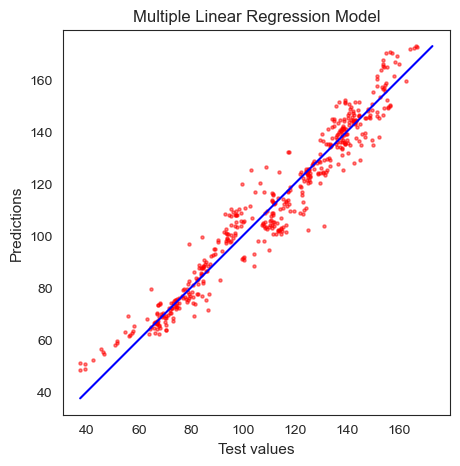

In [108]:
plt.figure(figsize=(5,5))
plt.scatter(Y_test, pred_y, c='red', s=5, alpha=0.5)
plt.title('Multiple Linear Regression Model')
p1 = max(max(pred_y), max(Y_test))
p2 = min(min(pred_y), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Test values', fontsize=11)
plt.ylabel('Predictions', fontsize=11)
plt.axis('equal')
plt.show()

### Lasso regression

In [109]:
# make a prediction with a lasso regression model 
from sklearn.linear_model import Lasso

In [110]:
# define model
model = Lasso(alpha=1.0)

In [111]:
# fit model
model.fit(X_train, Y_train)

Lasso()

In [112]:
regressor.coef_

array([ 0.12,  0.35,  0.42,  0.25,  0.3 , -1.16,  0.57,  0.59])

In [113]:
regressor.intercept_

-0.7283130677859901

In [114]:
y_predict = model.predict(X_test)

In [115]:
print(y_predict)

[108.9  135.1  145.67  71.46  58.49  65.45  97.3   81.33  72.2  136.48
 102.23 103.8   64.57 100.91 140.73  83.18 109.03 127.34 122.65 164.04
  69.6   88.62 102.94 137.05 134.61 120.75  58.89 107.91 119.83 107.83
 105.28  89.11 128.3   75.97 127.6  103.52 126.06 118.56  47.89  73.99
 124.64 126.15  80.49 116.5  121.26 143.35  88.73 161.03  90.77 146.49
 145.58  87.06 113.51  90.57  61.56 110.75  86.78 121.29 137.08  66.85
 154.97 156.16  63.91 116.94  68.28 108.41 123.52  98.5  125.11  61.76
  66.29 150.88 136.75 169.7  114.6   92.72 128.3   69.94 140.25 143.12
 103.35 124.51  75.12 147.74  73.29 122.73 105.54  79.09 137.24 123.29
 113.41 143.51  74.17  76.19 160.01 167.37  82.86 148.48 155.37 149.56
  69.97 145.19 143.66  87.14 113.07 142.41 164.75 135.92  56.15  89.24
 133.32 104.07 141.27  79.2  127.8  141.64 116.77 134.55  77.86 112.64
 137.51  62.88  64.5  123.72 102.68 110.09 100.63 146.18 113.47 170.37
 116.12 141.61 149.48  76.09 123.54 100.77  75.51 139.53 135.24 145.18
 142.5

In [116]:
mse = mean_squared_error(Y_test, y_predict)
rmse = math.sqrt(mse)
mae = mean_absolute_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)

In [117]:
print("MSE = ", mse)
print("RMSE = ", rmse)
print("MAE = ", mae)
print("R squared = ", r2)

MSE =  47.645853554869355
RMSE =  6.902597594737024
MAE =  5.229967057368739
R squared =  0.9476862131366125


In [118]:
# To view the predicted y values and test y values
np.set_printoptions(precision=2)
print(np.concatenate((y_predict.reshape(len(y_predict),1), Y_test.reshape(len(Y_test),1)),1))

[[108.9   99.32]
 [135.1  150.01]
 [145.67 144.56]
 [ 71.46  86.72]
 [ 58.49  51.37]
 [ 65.45  67.73]
 [ 97.3   94.89]
 [ 81.33  82.58]
 [ 72.2   72.88]
 [136.48 144.5 ]
 [102.23 114.6 ]
 [103.8  111.94]
 [ 64.57  58.2 ]
 [100.91 114.61]
 [140.73 138.37]
 [ 83.18  82.  ]
 [109.03 121.96]
 [127.34 126.67]
 [122.65 124.85]
 [164.04 153.16]
 [ 69.6   69.17]
 [ 88.62  84.55]
 [102.94 108.51]
 [137.05 149.79]
 [134.61 133.78]
 [120.75 123.37]
 [ 58.89  51.39]
 [107.91  97.54]
 [119.83 125.05]
 [107.83  97.49]
 [105.28  97.24]
 [ 89.11  83.23]
 [128.3  129.73]
 [ 75.97  75.37]
 [127.6  142.66]
 [103.52 115.6 ]
 [126.06 130.07]
 [118.56 118.27]
 [ 47.89  37.35]
 [ 73.99  74.33]
 [124.64 113.75]
 [126.15 108.68]
 [ 80.49  80.6 ]
 [116.5  104.58]
 [121.26 124.72]
 [143.35 142.17]
 [ 88.73  84.88]
 [161.03 158.19]
 [ 90.77 100.37]
 [146.49 140.44]
 [145.58 151.56]
 [ 87.06  84.05]
 [113.51 117.41]
 [ 90.57  85.  ]
 [ 61.56  56.26]
 [110.75 124.21]
 [ 86.78  86.07]
 [121.29 125.47]
 [137.08 137.7

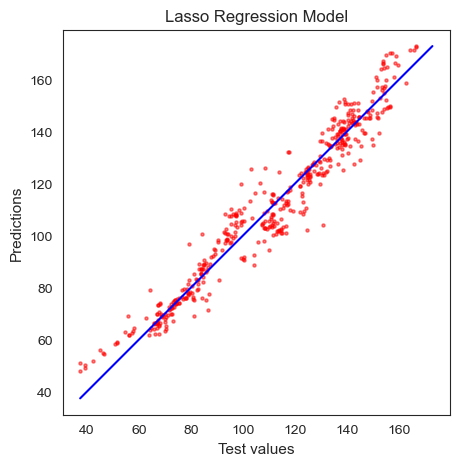

In [119]:
plt.figure(figsize=(5,5))
plt.scatter(Y_test, y_predict, c='red', s=5, alpha=0.5)
plt.title('Lasso Regression Model')
p1 = max(max(y_predict), max(Y_test))
p2 = min(min(y_predict), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Test values', fontsize=11)
plt.ylabel('Predictions', fontsize=11)
plt.axis('equal')
plt.show()

### Artificial Neural Networks

In Tensorflow from: https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/

In [120]:
!pip install tensorflow

In [121]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [122]:
# Defining the first column (Miscellaneous) as the target and the rest columns as independent variables.
X = dbP.iloc[:, 1:9]
Y = dbP.iloc[:, 0]

In [123]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0)

In [124]:
# To train the dataset
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [125]:
# loss function
msle = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    X_train, 
    Y_train, 
    epochs=12, 
    batch_size=64,
    validation_split=0.2
)

Epoch 1/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 5.1092 - mean_squared_logarithmic_error: 5.1092 - val_loss: 1.3312 - val_mean_squared_logarithmic_error: 1.3312
Epoch 2/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0240 - mean_squared_logarithmic_error: 1.0240 - val_loss: 0.0470 - val_mean_squared_logarithmic_error: 0.0470
Epoch 3/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1452 - mean_squared_logarithmic_error: 0.1452 - val_loss: 0.0331 - val_mean_squared_logarithmic_error: 0.0331
Epoch 4/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0838 - mean_squared_logarithmic_error: 0.0838 - val_loss: 0.0347 - val_mean_squared_logarithmic_error: 0.0347
Epoch 5/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0435 - mean_squared_logarithmic_error: 0.0435 - val_loss: 0.0070 - val_mean_squared_logarithmic_error: 0.0070
Epoch 6/12
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0401 - mean_squared_logarithmic_error: 0.0401 - val_loss: 0.0065 - val_mean_squared_

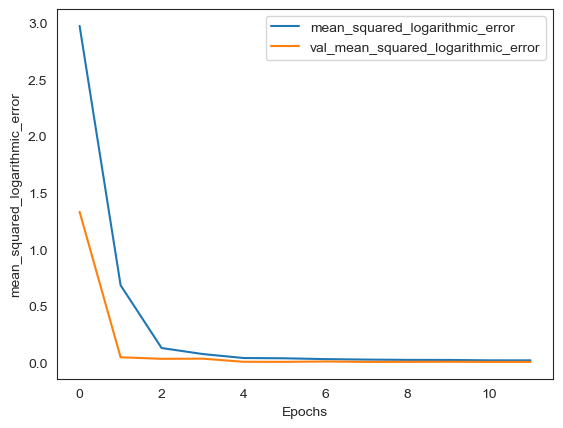

In [126]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [127]:
Y_predicted = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [128]:
Y_predicted

array([[103.81],
       [131.16],
       [141.73],
       [ 67.28],
       [ 54.34],
       [ 62.6 ],
       [ 95.35],
       [ 78.64],
       [ 69.54],
       [132.17],
       [ 99.31],
       [100.87],
       [ 61.16],
       [ 97.78],
       [137.29],
       [ 81.4 ],
       [106.42],
       [126.  ],
       [119.9 ],
       [160.82],
       [ 68.14],
       [ 87.34],
       [ 99.74],
       [132.82],
       [130.76],
       [118.67],
       [ 54.85],
       [108.95],
       [117.35],
       [108.75],
       [100.53],
       [ 89.14],
       [125.31],
       [ 72.92],
       [124.37],
       [100.91],
       [122.86],
       [117.5 ],
       [ 42.65],
       [ 71.85],
       [121.99],
       [121.3 ],
       [ 77.93],
       [112.08],
       [118.73],
       [140.13],
       [ 87.37],
       [159.96],
       [ 88.66],
       [146.94],
       [142.57],
       [ 85.68],
       [112.22],
       [ 90.91],
       [ 58.55],
       [107.47],
       [ 85.33],
       [118.43],
       [132.87

Checking accuracy:

In [129]:
mse = mean_squared_error(Y_test, Y_predicted)
rmse = math.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_predicted,)
r2 = r2_score(Y_test, Y_predicted)
print("MSE = ", mse)
print('RMSE = ', rmse)
print('MAE = ', mae)
print('R squared = ', r2)

MSE =  56.25584215602804
RMSE =  7.500389466956235
MAE =  5.971747227151281
R squared =  0.9382326914768839


In [130]:
Y_test.head()

34       99.32
1061    150.01
1256    144.56
333      86.72
141      51.37
Name: Miscellaneous, dtype: float64

In [283]:
# To see Y_predicted with Y_test
np.set_printoptions(precision=2)
print(np.concatenate((Y_predicted, Y_test.values.reshape(len(Y_test), 1)),1))

[[103.81  99.32]
 [131.16 150.01]
 [141.73 144.56]
 [ 67.28  86.72]
 [ 54.34  51.37]
 [ 62.6   67.73]
 [ 95.35  94.89]
 [ 78.64  82.58]
 [ 69.54  72.88]
 [132.17 144.5 ]
 [ 99.31 114.6 ]
 [100.87 111.94]
 [ 61.16  58.2 ]
 [ 97.78 114.61]
 [137.29 138.37]
 [ 81.4   82.  ]
 [106.42 121.96]
 [126.   126.67]
 [119.9  124.85]
 [160.82 153.16]
 [ 68.14  69.17]
 [ 87.34  84.55]
 [ 99.74 108.51]
 [132.82 149.79]
 [130.76 133.78]
 [118.67 123.37]
 [ 54.85  51.39]
 [108.95  97.54]
 [117.35 125.05]
 [108.75  97.49]
 [100.53  97.24]
 [ 89.14  83.23]
 [125.31 129.73]
 [ 72.92  75.37]
 [124.37 142.66]
 [100.91 115.6 ]
 [122.86 130.07]
 [117.5  118.27]
 [ 42.65  37.35]
 [ 71.85  74.33]
 [121.99 113.75]
 [121.3  108.68]
 [ 77.93  80.6 ]
 [112.08 104.58]
 [118.73 124.72]
 [140.13 142.17]
 [ 87.37  84.88]
 [159.96 158.19]
 [ 88.66 100.37]
 [146.94 140.44]
 [142.57 151.56]
 [ 85.68  84.05]
 [112.22 117.41]
 [ 90.91  85.  ]
 [ 58.55  56.26]
 [107.47 124.21]
 [ 85.33  86.07]
 [118.43 125.47]
 [132.87 137.7

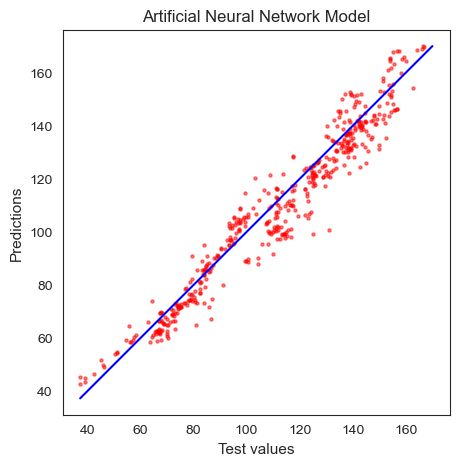

In [132]:
# Visualisation
plt.figure(figsize=(5,5))
plt.scatter(Y_test, Y_predicted, c='red', s=5, alpha=0.5)
plt.title('Artificial Neural Network Model')
Y_pred = np.reshape(Y_predicted, len(Y_predicted))
p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Test values', fontsize=11)
plt.ylabel('Predictions', fontsize=11)
plt.axis('equal')

plt.show()

# Supervised ML algorithm: Classification

### Logistic Regression 

In [133]:
dbc = db6[db6['GenderCode'] < 2]

In [134]:
dbc.head()

,Miscellaneous,AutomotiveFuel,Entertainment,Groceries,EatingOut,GenderCode,MissingS,PrivateSector,PublicSector,RegionCode
0,0.134839,-0.134307,1.604683,-0.998047,1.082282,0,0.0,1.0,0.0,0
1,0.251187,-0.042499,1.718644,-0.727632,1.167512,1,0.0,1.0,0.0,6
2,0.255054,0.052690,1.674272,-0.716736,1.168399,1,0.0,1.0,0.0,5
3,0.211222,0.130453,1.444117,-0.695439,1.095599,1,0.0,1.0,0.0,3
4,0.130005,0.126032,1.153310,-0.739518,0.910935,1,0.0,1.0,0.0,2


In [135]:
dbc.shape

(1031, 10)

In [136]:
db7 = dbc[['Miscellaneous','AutomotiveFuel','Entertainment','Groceries','EatingOut','GenderCode']]

In [137]:
db7.head()

,Miscellaneous,AutomotiveFuel,Entertainment,Groceries,EatingOut,GenderCode
0,0.134839,-0.134307,1.604683,-0.998047,1.082282,0
1,0.251187,-0.042499,1.718644,-0.727632,1.167512,1
2,0.255054,0.052690,1.674272,-0.716736,1.168399,1
3,0.211222,0.130453,1.444117,-0.695439,1.095599,1
4,0.130005,0.126032,1.153310,-0.739518,0.910935,1


In [138]:
# To assign the last column as the target (GenderCode)
X = db7.iloc[:, :-1].values
y = db7.iloc[:, -1].values

In [139]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [140]:
# Training the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [141]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
# [predicted value, original value]

[[1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]

In [142]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
# confusion matrix gives: the truly predicted values (1,1), false postives (1,0), positive negatives (0,1), truly negatives values(0,0)
accuracy_score(y_test, y_pred)
# Accuracy is the sum of true positives and true negatives divided by the sum of all

[[55 71]
 [56 76]]


0.5077519379844961

In [143]:
from sklearn import metrics

In [144]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5077519379844961
Precision: 0.5170068027210885
Recall: 0.5757575757575758


Text(0.5, 269.55555555555554, 'Predicted label')

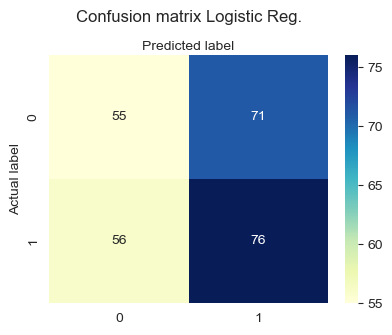

In [145]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(4,3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Logistic Reg.', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Naive Bayes Classification 

In [146]:
X = db7.iloc[:, :-1].values
y = db7.iloc[:, -1].values

In [147]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [148]:
# Training
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [149]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 0]

In [150]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[30 96]
 [45 87]]


0.45348837209302323

Text(0.5, 269.55555555555554, 'Predicted label')

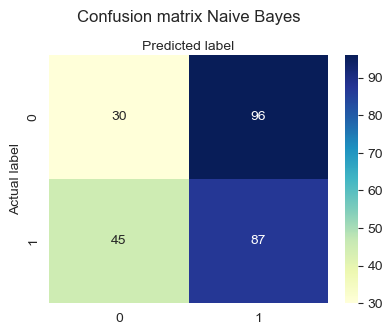

In [151]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(4,3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Decision Trees

In [152]:
X = db7.iloc[:, :-1]
y = db7.iloc[:, -1]

In [153]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion = 'gini',random_state=42)

In [156]:
# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

In [157]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

In [158]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5813953488372093


In [159]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[74 54]
 [54 76]]


0.5813953488372093

Text(0.5, 269.55555555555554, 'Predicted label')

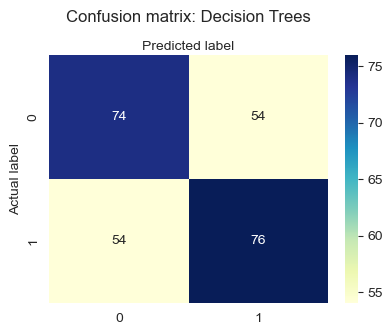

In [160]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots(figsize=(4,3))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix: Decision Trees', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [261]:
from sklearn.tree import plot_tree, export_text

In [262]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:10000])

|--- Miscellaneous <= 1.52
|   |--- AutomotiveFuel <= -0.04
|   |   |--- AutomotiveFuel <= -0.89
|   |   |   |--- Entertainment <= -1.42
|   |   |   |   |--- EatingOut <= -1.64
|   |   |   |   |   |--- AutomotiveFuel <= -1.31
|   |   |   |   |   |   |--- Groceries <= -1.06
|   |   |   |   |   |   |   |--- Entertainment <= -1.80
|   |   |   |   |   |   |   |   |--- AutomotiveFuel <= -2.30
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- AutomotiveFuel >  -2.30
|   |   |   |   |   |   |   |   |   |--- Entertainment <= -1.82
|   |   |   |   |   |   |   |   |   |   |--- Groceries <= -1.16
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- Groceries >  -1.16
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Entertainment >  -1.82
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Entertainment >  -1.

In [162]:
model.feature_importances_    
# feature importance are the key elements for decision tree compared to LinearRegression and LogisticRegression 
# we use features and weights, we use importance and max_dept or max_leaf_nodes

array([0.21, 0.22, 0.17, 0.21, 0.19])

In [163]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [164]:
importance_df.head(10)

,feature,importance
1,AutomotiveFuel,0.217655
3,Groceries,0.210786
0,Miscellaneous,0.208518
4,EatingOut,0.191574
2,Entertainment,0.171467


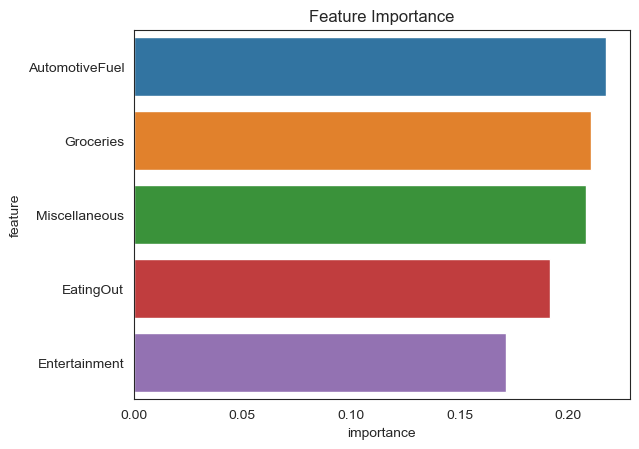

In [165]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# Unsupervised ML algorithm

In [236]:
dbu = db5.iloc[0:50,]

In [237]:
dbu = dbu[['Groceries','EatingOut']]

In [238]:
dbu.head()

,Groceries,EatingOut
0,101.79,119.09
1,107.25,121.97
2,107.47,122.00
3,107.90,119.54
4,107.01,113.30


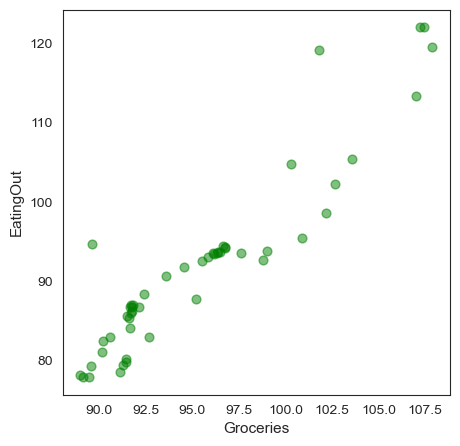

In [242]:
plt.figure(figsize=(5,5))
plt.scatter(dbu.iloc[:,0], dbu.iloc[:,1],  c='green', s=40, alpha=0.5)
plt.xlabel('Groceries', fontsize=11)
plt.ylabel('EatingOut', fontsize=11)
plt.show()

In [243]:
X = dbu.values

In [244]:
from sklearn.cluster import KMeans

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

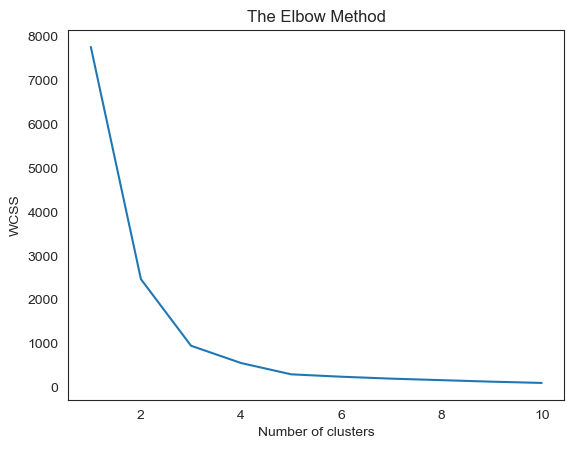

In [245]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Inflection point or elbow point is 3

In [258]:
# Training
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


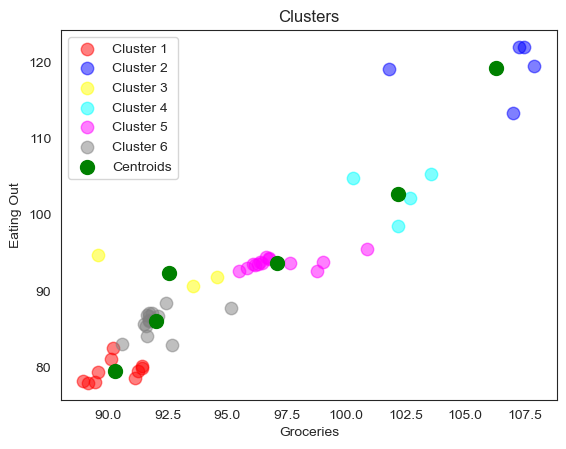

In [259]:
# Visualising
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 80, alpha=0.5, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 80, alpha=0.5, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 80, alpha=0.5, c = 'yellow', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 80, alpha=0.5,c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 80, alpha=0.5, c = 'magenta', label = 'Cluster 5')
plt.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], s = 80, alpha=0.5, c = 'grey', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'green', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Groceries')
plt.ylabel('Eating Out')
plt.legend()
plt.show()

In [260]:
from sklearn.metrics import silhouette_score
>>> silhouette_score(X, kmeans.labels_)

0.5778615393657326